กลุ่ม Fruit Recognition จัดทำโดย
1.   ณัทธร เชิงเชาว์ 6209610416
2.   ณัฐนนท์ ราษฎร์บริรักษ์ 6209680799
3.   สิรวิชญ์ คล้ายรัศมี 6209680831

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
PATH = '/content/drive/MyDrive/fruits_dataset/rgb_dataset'

X_train = np.loadtxt(PATH + '/' +'X_train_image.txt')
X_test = np.loadtxt(PATH + '/' +'X_test_image.txt')

y_train = np.loadtxt(PATH + '/' +'y_train_image.txt').astype('int')
y_test = np.loadtxt(PATH + '/' +'y_test_image.txt').astype('int')

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(35510, 21)
(11890, 21)
(35510,)
(11890,)


โหลดชุดข้อมูลที่หลังจากทำการ Data preparing แล้ว

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

เนื่องจากข้อมูลสีของรูปผลไม้ทั้งหมดเป็น continueous data จึงจะต้อง scaling ข้อมูลสีเพื่อที่จะให้ข้อมูลอยู่จุดศูนย์กลาง และบาง algorithm จำเป็นต้อง scaling ข้อมูลก่อนเพราะว่ามัน sensitive มากกับข้อมูล

# ขั้นตอนการ Imprements

การสร้างโมเดลเพื่อที่จะทำนายรูปผลไม้ เราจะใช้ algorithm ในการทำโมเดลมีดังนี้ k-Nearest Neighbors, Naïve Bayes, SVC, Neural Network, Decision Tree และ Random Forest

## Supervised Learning

**k-Nearest Neighbors**

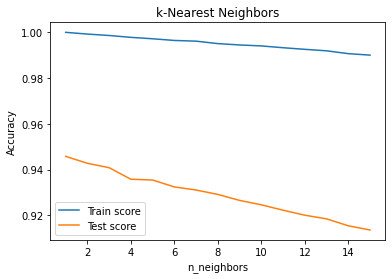

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_score = []
knn_test_score = []
n_neighbors = np.arange(1,16)

for nb in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=nb).fit(X_train_scaled, y_train)
  knn_train_score.append(knn.score(X_train_scaled, y_train))
  knn_test_score.append(knn.score(X_test_scaled, y_test))

plt.title('k-Nearest Neighbors')
plt.plot(n_neighbors, knn_train_score, label='Train score')
plt.plot(n_neighbors, knn_test_score, label='Test score')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

จากกราฟพบว่าค่า accuracy ทั้งสองค่าลดลงและกราฟห่างออกจากกันตามจำนวน neighbors แล้วพบว่ายิ่งค่า neighbors มากเท่าไร test score จะยิ่งน้อยและมีอาการ overfit มากขึ้น

**SVC**

In [ ]:
from sklearn.svm import SVC

C = [0.001, 0.01, 1, 100]
gam = [0.001, 0.01, 1, 100]

test_score = np.zeros((len(C),len(gam)))

for i in range(len(C)):
  for j in range(len(gam)):
    svm = SVC(kernel='rbf', C=C[i], gamma=gam[j]).fit(X_train_scaled, y_train)
    test_score[i][j] = svm.score(X_test_scaled, y_test)

In [ ]:
def create_heatmap(score):
  fig, ax = plt.subplots(figsize=(6, 6))
  im = ax.imshow(score, cmap='summer')

  ax.set_xticks(np.arange(len(C)))
  ax.set_yticks(np.arange(len(gam)))

  ax.set_xticklabels(C)
  ax.set_yticklabels(gam)

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  
  for i in range(len(gam)):
    for j in range(len(C)):
      text = ax.text(j, i, "{:.4f}".format(score[i, j]),
                     ha="center", va="center", color="black")

  plt.xlabel('gamma')
  plt.ylabel('C')
  fig.tight_layout()
  plt.show()

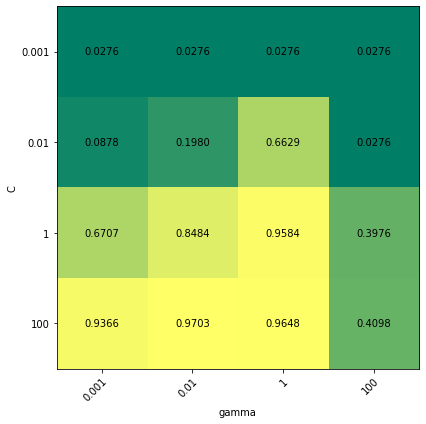

In [ ]:
create_heatmap(test_score)

จาก heatmap พบว่าเมื่อเราใช้ค่า C มาก และ gamma น้อย จะทำให้ค่า test score เพิ่มมากขึ้น ในทางกลับกัน หากเราใช้ค่า C น้อย และ gamma มากเท่าไร ค่า test score จะยิ่งน้อยลง

**Naïve Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB().fit(X_train_scaled, y_train)
print("Naive Bayes:")
print("Naive Bayes Train score: {:.4f}".format(nb.score(X_train_scaled, y_train)))
print("Naive Bayes Test score: {:.4f}".format(nb.score(X_test_scaled, y_test)))

Naive Bayes:
Naive Bayes Train score: 0.7639
Naive Bayes Test score: 0.6666


จากการทำโมเดลพบว่า Train score กับ Test score มีค่าน้อย เมื่อเทียบกับ algorithm อื่นๆ

**Neural Network**

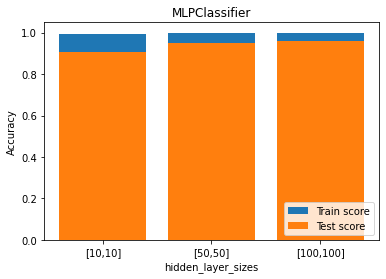

In [ ]:
from sklearn.neural_network import MLPClassifier

hls = [[10,10],[50,50],[100,100]]
train_score_adam = []
test_score_adam = []

for h in hls:
  mlp_adam = MLPClassifier(solver='adam', max_iter=1000, random_state=0, hidden_layer_sizes=h).fit(X_train_scaled, y_train)
  train_score_adam.append(mlp_adam.score(X_train_scaled, y_train))
  test_score_adam.append(mlp_adam.score(X_test_scaled, y_test))

hs_name = ["[10,10]", "[50,50]", "[100,100]"]
plt.title('MLPClassifier')
plt.bar(hs_name, train_score_adam, label='Train score')
plt.bar(hs_name, test_score_adam, label='Test score')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Accuracy')
plt.legend(loc=4)
plt.show()

จากกราฟพบว่า ความละเอียดของ Hidden Layer มากเท่าไร Test score จะยิ่งมากขึ้นและมีความ generalization แต่ค่า Train score ยังคงที่ประมาณ 0.99

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train_scaled, y_train)
print("Decision Tree before Pre-pruning:")
print("Train score: {:.4f}".format(tree.score(X_train_scaled, y_train)))
print("Test score: {:.4f}".format(tree.score(X_test_scaled, y_test)))

Decision Tree before Pre-pruning:
Train score: 1.0000
Test score: 0.8539


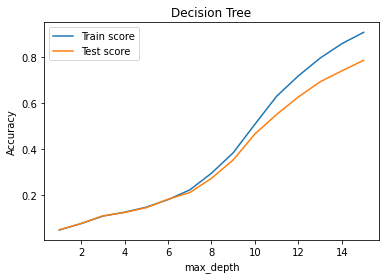

In [ ]:
tree_train_score = []
tree_test_score = []
max_depth = np.arange(1,16)

for md in max_depth:
  tree = DecisionTreeClassifier(max_depth=md, random_state=0).fit(X_train_scaled, y_train)
  tree_train_score.append(tree.score(X_train_scaled, y_train))
  tree_test_score.append(tree.score(X_test_scaled, y_test))

plt.title('Decision Tree')
plt.plot(max_depth, tree_train_score, label='Train score')
plt.plot(max_depth, tree_test_score, label='Test score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

เมื่อเรา train โมเดลก่อนที่จะทำการ Pre-pruning จะพบว่า train และ test score มีอาการ overfit และถ้าเราทำการ Pre-pruning จะพบว่าในกราฟนี้ จากค่า max_depth ตั้งแต่ 1 ถึง 6 มีอาการ underfit พอถึงค่าตั้งแต่ 6 ขึ้นไป จะพบว่าทั้งสองค่ามีความแตกต่างกัน กล่าวคือค่าทั้งสองค่ามีระยะห่างออกจากกันตาม max_depth

**Random Forest**

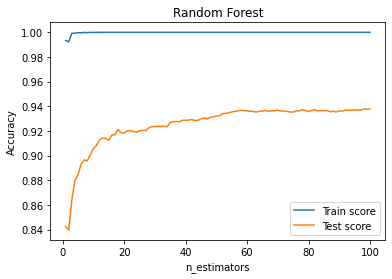

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_train_score = []
forest_test_score = []
n_estimators = np.arange(1,101)

for nes in n_estimators:
  forest = RandomForestClassifier(n_estimators=nes, n_jobs=-1, random_state=0).fit(X_train_scaled, y_train)
  forest_train_score.append(forest.score(X_train_scaled, y_train))
  forest_test_score.append(forest.score(X_test_scaled, y_test))

plt.title('Random Forest')
plt.plot(n_estimators, forest_train_score, label='Train score')
plt.plot(n_estimators, forest_test_score, label='Test score')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

จากกราฟพบว่าในค่า test score ที่มีค่า estimators ตั้งแต่ค่า 1 ถึง 20 เป็นต้นไป มีอาการ overfit ส่วนค่า estimators ตั้งแต่ 21 ขึ้นไปค่า training และ test score จะค่อนข้างคงที่และเกิด generailzation 

## Clustering

In [ ]:
X = np.concatenate((X_train, X_test))
X = X[:,0:3]

y = np.concatenate((y_train, y_test))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

นำ X_train_scaled, X_test_scaled และ y_train, y_test มาต่อกัน

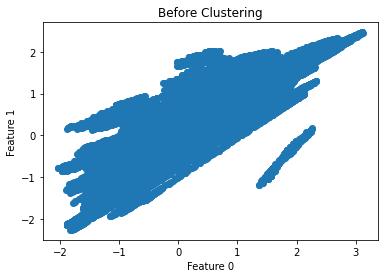

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title('Before Clustering')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

กราฟก่อนทำการ Clustering

**K-Means**

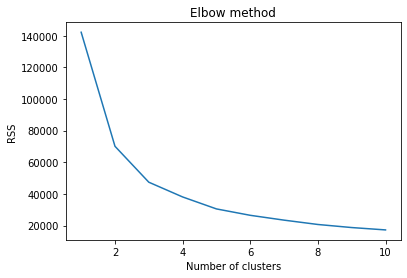

In [ ]:
from sklearn.cluster import KMeans

rss = []
n_clusters = np.arange(1, 11)
for nc in n_clusters:
  kmeans = KMeans(n_clusters = nc, n_init = 100, random_state = 17)
  kmeans.fit(X_scaled)
  rss.append(kmeans.inertia_)

plt.plot(n_clusters, rss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("RSS")
plt.show()

สร้างกราฟ Elbow method เพื่อหาค่า Elbow point กล่าวคือหาจำนวน cluster ที่มีแนวโน้มที่จะลดค่า RSS น้อยลง แล้วจำนวน cluster ที่มีเงื่อนไขดังกล่าว จะเป็นค่า Elbow point ทันที

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, n_init = 100, random_state = 17)
y_kmeans = kmeans.fit_predict(X_scaled)

พอหาค่า Elbow point เสร็จแล้วจึงนำมา train กับข้อมูล แล้วเก็บค่า label หลังจาก train ข้อมูลกับ K-Means แล้ว

In [ ]:
centroid = kmeans.cluster_centers_

แสดง cluster centers ทั้ง 2 cluster แล้วนำมาพล็อตกราฟ

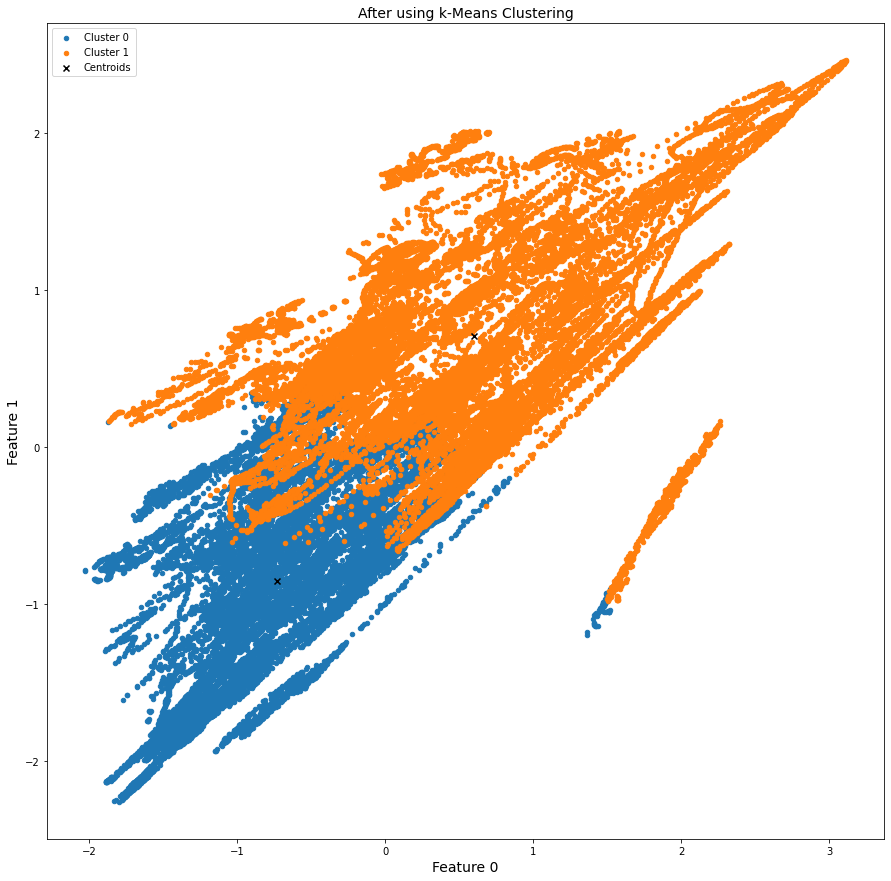

In [ ]:
plt.figure(figsize=(15,15))
font_dict = {'family': 'DejaVu Sans', 'size': 14}

for i in range(2):
  plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], s=20, cmap='viridis', label='Cluster '+str(i))
  
plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', c='black', label='Centroids')
plt.title('After using k-Means Clustering', font_dict)
plt.xlabel('Feature 0', font_dict)
plt.ylabel('Feature 1', font_dict)
plt.legend()
plt.show()

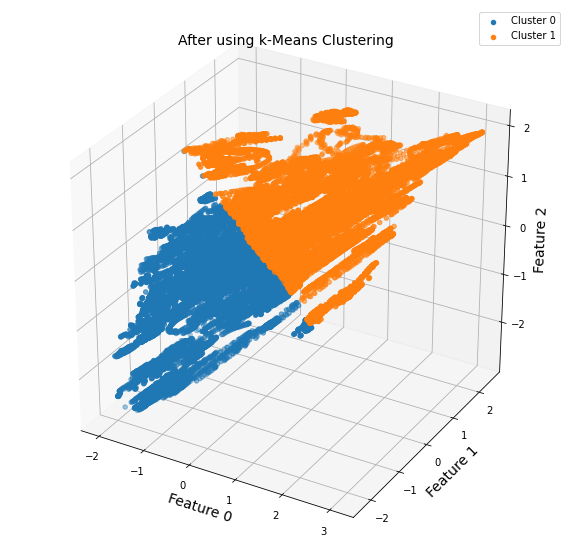

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
font_dict = {'family': 'DejaVu Sans', 'size': 14}

for i in range(2):
  ax.scatter(X_scaled[y_kmeans == i,0], X_scaled[y_kmeans == i,1], X_scaled[y_kmeans == i,2], label=f'Cluster {i}')

ax.set_title('After using k-Means Clustering', font_dict)
ax.set_xlabel('Feature 0', font_dict)
ax.set_ylabel('Feature 1', font_dict)
ax.set_zlabel('Feature 2', font_dict)
ax.legend()
plt.show()

จากกราฟพบว่า กราฟมีการจัดกลุ่มกันเป็นก้อนๆ แต่บางข้อมูลมีการปะปนกับ cluster อื่นๆ จึงทำให้กราฟดูไม่เรียบร้อย พอเราสร้างกราฟ 3 มิติ จะพบว่ากราฟมีการจัดกลุ่มกันเป็นก้อนๆ และเป็นระเบียบเรียบร้อย

In [ ]:
centroid_info = scaler.inverse_transform(centroid)
print("Cluster center:")
print(centroid)
print("\n")
print("Cluster center after inverse transform:")
print(centroid_info)
print("\n")
print("Red : {}".format(centroid_info[:,0]))
print("Green : {}".format(centroid_info[:,1]))
print("Blue : {}".format(centroid_info[:,2]))

Cluster center:
[[-0.72716573 -0.85398774 -0.75741254]
 [ 0.60383735  0.70915016  0.62895425]]


Cluster center after inverse transform:
[[102.66177553 115.08440791 143.41899681]
 [144.80285425 173.86740701 194.83939186]]


Red : [102.66177553 144.80285425]
Green : [115.08440791 173.86740701]
Blue : [143.41899681 194.83939186]


เมื่อแสดง cluster centers ทั้ง 3 cluster จะพบว่า ค่าเฉลี่ยทั้่ง 3 สี จะจำแนกตามความเข้มของสี เช่น ค่าเฉลี่ยของสีแดงเป็น 91.64057754 คาดว่าจะเป็นผลไม้ที่มีสีแดงเข้ม

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y_dbscan = dbscan.fit_predict(X_scaled)

ทำการ train ข้อมูลโดยใช้ DBSCAN

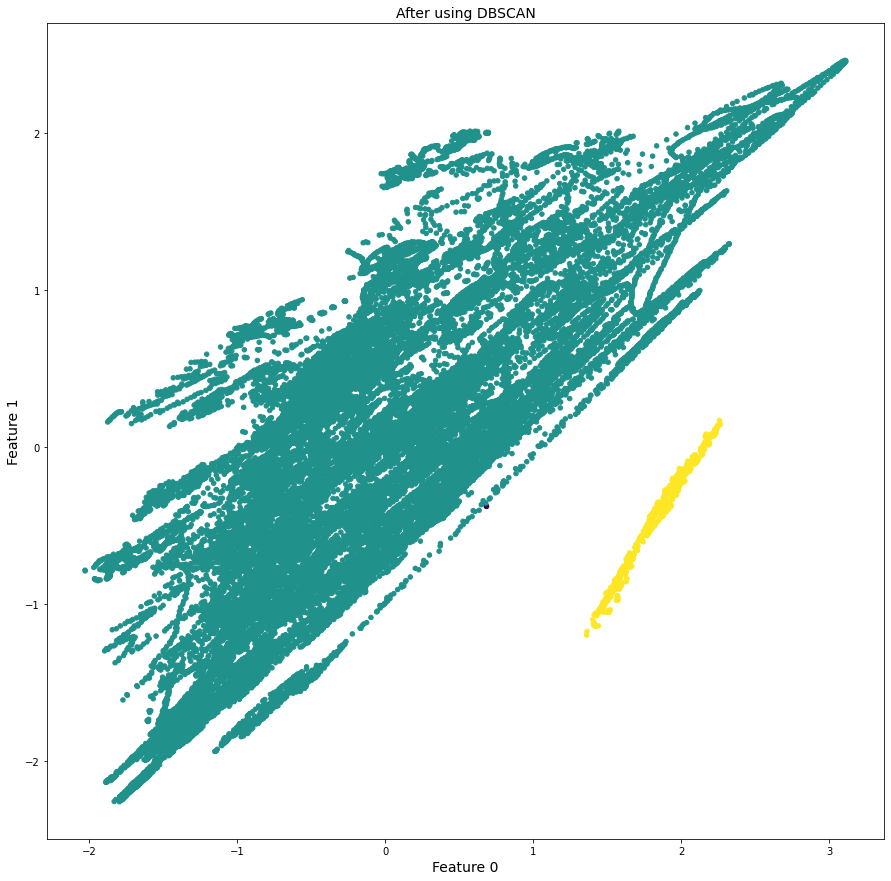

In [ ]:
plt.figure(figsize=(15,15))
font_dict = {'family': 'DejaVu Sans', 'size': 14}

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, s=20, cmap='viridis')
plt.title('After using DBSCAN', font_dict)
plt.xlabel('Feature 0', font_dict)
plt.ylabel('Feature 1', font_dict)
plt.show()

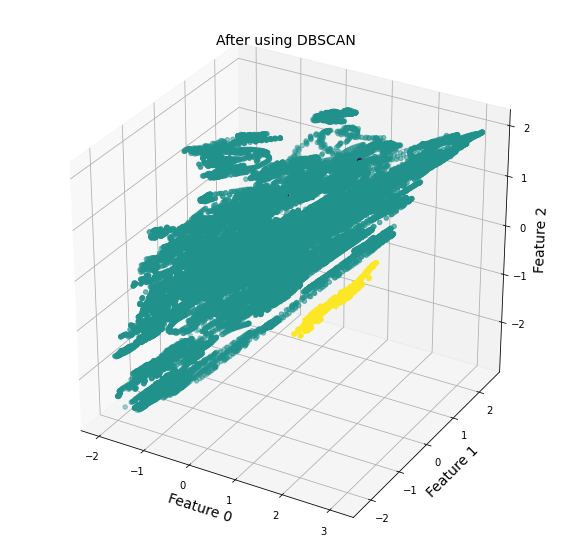

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
font_dict = {'family': 'DejaVu Sans', 'size': 14}

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_dbscan, s=20, cmap='viridis')
ax.set_title('After using DBSCAN', font_dict)
ax.set_xlabel('Feature 0', font_dict)
ax.set_ylabel('Feature 1', font_dict)
ax.set_zlabel('Feature 2', font_dict)
plt.show()

จากกราฟพบว่า กราฟมีการจัดกลุ่มกันแบบมีระเบียบเรียบร้อยได้อย่างชัดเจน แต่อาจมีบางส่วนหลงเหลือไปด้วย

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI k-Means: {:.4f}".format(adjusted_rand_score(y, y_kmeans)))
print("ARI DBSCAN: {:.4f}".format(adjusted_rand_score(y, y_dbscan)))

ARI k-Means: 0.0193
ARI DBSCAN: 0.0008


In [ ]:
from sklearn.metrics.cluster import silhouette_score

print("Silhouette Score k-Means: {:.4f}".format(silhouette_score(X_scaled, y_kmeans)))
print("Silhouette Score DBSCAN: {:.4f}".format(silhouette_score(X_scaled, y_dbscan)))

Silhouette Score k-Means: 0.4059
Silhouette Score DBSCAN: 0.0064


จากการประเมินโมเดลในการทำ clustering จะพบว่าค่า ARI กับ Silhouette Score ทั้งสองโมเดลไม่ค่อยดีนัก จึงทำให้ไม่เหมาะแก่การใช้งานจริง

## Cross-Validation

การทำ Cross-Validation เราจะใช้ GridSearchCV ที่จะหาค่าพารามิเตอร์ในแต่ละ algorithm ที่ดีที่สุด แล้วนำมาทำ Model Evaluation เพื่อหาว่าค่าพารามิเตอร์ที่หลังจากทำ GridSearchCV ที่เหมาะแก่การทำโมเดลที่ดีที่สุด

In [ ]:
name_cv = ["KNeighborsClassifier", "SVC", "Neural Network", "Decision Tree", "Random Forest"]

In [ ]:
from sklearn.model_selection import GridSearchCV

param_knn = {'n_neighbors':np.arange(1, 16)}
param_svc = {'kernel':['rbf'], 'C':[0.001, 0.01, 1, 100], 'gamma':[0.001, 0.01, 1, 100]}
param_neural_network = {'max_iter':[1000], 'hidden_layer_sizes':[[10,10], [50, 50], [100, 100]]}
param_tree = {'max_depth':np.arange(1,16)}
param_forest = {'n_estimators':np.arange(1,101), 'n_jobs':[-1]}

param = [param_knn, param_svc, param_neural_network, param_tree, param_forest]

In [ ]:
algo_cv = [KNeighborsClassifier(), SVC(), MLPClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
cv = []
for i in range(len(algo_cv)):
  cv.append(GridSearchCV(algo_cv[i], param[i]).fit(X_train_scaled, y_train))

สร้างฟังก์ชันของ GridSearchCV เพื่อใช้ในการหาค่าพารามิเตอร์แต่ละ Algorithm ที่ดีที่สุด

In [ ]:
best_param = []
for i in range(len(algo_cv)):
  print(cv[i].best_params_)
  best_param.append(cv[i].best_params_)

{'n_neighbors': 1}
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
{'hidden_layer_sizes': [100, 100], 'max_iter': 1000}
{'max_depth': 15}
{'n_estimators': 100, 'n_jobs': -1}


แสดงค่าพารามิเตอร์ที่ดีที่สุดในแต่ละ algorithm หลังจากทำ GridSearchCV

## Model Evaluation

ในการทำ Model Evaluation เพื่อที่จะประเมินว่า algorithm ไหนเหมาะสมในการใช้งานจริง แต่เนื่องจาก target ของชุดข้อมูลนี้มีจำนวน target 70 ตัว ทำให้มีความยุ่งยากในการประเมินโมเดล ดังนั้นจึงจะต้องลดจำนวน target ให้เหลือสองตัว โดยการทำเป็น negative class ช่วยให้ประเมินได้ง่ายขึ้น และเข้าใจง่าย

In [ ]:
X_new = np.concatenate((X_train_scaled, X_test_scaled))
y_new = np.concatenate((y_train, y_test))

In [ ]:
y_new = y_new == 0

เก็บค่า y_new เพื่อที่จะเก็บค่า boolean เมื่อ target เป็น 0 (Apple Braeburn) โดยกำหนดให้ Apple Braeburn เป็นค่า true และ not Apple Braeburn เป็น false

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, random_state = 21)

ทำการแยกข้อมูลใหม่ออกเป็น train และ test

In [ ]:
best_n_neighbors = best_param[0]['n_neighbors']

best_c = best_param[1]['C']
best_gamma = best_param[1]['gamma']

best_hidden_layer_sizes = best_param[2]['hidden_layer_sizes']

best_max_depth = best_param[3]['max_depth']

best_n_estimators = best_param[4]['n_estimators']

สร้างตัวแปรต่างๆ เพื่อเก็บค่าพารามิเตอร์หลังจากทำ GridSearchCV เพื่อที่จะประเมินโมเดล

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train_new, y_train_new)
knn_pred = knn.predict(X_test_new)
knn_pred_proba = knn.predict_proba(X_test_new)

nb = GaussianNB().fit(X_train_new, y_train_new)
nb_pred = nb.predict(X_test_new)
nb_pred_proba = nb.predict_proba(X_test_new)

svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma, probability=True).fit(X_train_new, y_train_new)
svm_pred = svm.predict(X_test_new)
svm_pred_proba = svm.predict_proba(X_test_new)

mlp_adam = MLPClassifier(solver='adam', max_iter=1000, random_state=0, hidden_layer_sizes=best_hidden_layer_sizes).fit(X_train_new, y_train_new)
mlp_pred = mlp_adam.predict(X_test_new)
mlp_pred_proba = mlp_adam.predict_proba(X_test_new)

tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=0).fit(X_train_new, y_train_new)
tree_pred = tree.predict(X_test_new)
tree_pred_proba = tree.predict_proba(X_test_new)

forest = RandomForestClassifier(n_estimators=best_n_estimators, n_jobs=-1, random_state=0).fit(X_train_new, y_train_new)
forest_pred = forest.predict(X_test_new)
forest_pred_proba = forest.predict_proba(X_test_new)

นำพารามิเตอร์ที่ดีที่สุดนำมาใส่ใน Algorithm ต่างๆ

In [ ]:
y_pred = [knn_pred, nb_pred, svm_pred, mlp_pred, tree_pred, forest_pred]

In [ ]:
y_pred_proba = [knn_pred_proba, nb_pred_proba, svm_pred_proba, mlp_pred_proba, tree_pred_proba, forest_pred_proba]

สร้าง list y_pred กับ y_pred_proba เพื่อเก็บ list ของ target และค่าความน่าจะเป็น หลังจากทำนายโมเดลต่างๆ ตามลำดับ

In [ ]:
model_name = ["KNeighborsClassifier", "Naive Bayes", "SVC", "Neural Network", "Decision Tree", "Random Forest"]

No handles with labels found to put in legend.


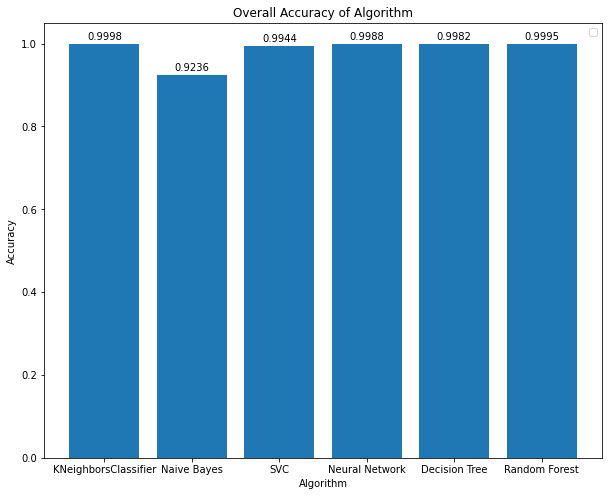

In [ ]:
plt.figure(figsize=(10,8))
score = [knn.score(X_test_new, y_test_new), nb.score(X_test_new, y_test_new), svm.score(X_test_new, y_test_new),
         mlp_adam.score(X_test_new, y_test_new), tree.score(X_test_new, y_test_new), forest.score(X_test_new, y_test_new)]

plt.bar(model_name, score)
plt.title('Overall Accuracy of Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.legend()

for i in range(len(score)):
  plt.text(i, score[i]+0.01, "{:.4f}".format(score[i]), ha = 'center')

plt.show()

สร้างกราฟแสดงค่า accuracy ของ test score

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def heatmap_confusion_matrix(name, dataset):
  fig, ax = plt.subplots(figsize=(4, 4))
  im = ax.imshow(dataset, cmap='summer')

  ax.set_xticks(np.arange(2))
  ax.set_yticks(np.arange(2))

  ax.set_xticklabels(['not Apple Braeburn', 'Apple Braeburn'])
  ax.set_yticklabels(['not Apple Braeburn', 'Apple Braeburn'])

  plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
  
  for i in range(2):
    for j in range(2):
      text = ax.text(j, i, "{}".format(dataset[i, j]), ha="center", va="center", color="black")

  ax.set_title("Confusion Matrix of "+ name)    
  plt.xlabel('Predict label')
  plt.ylabel('True label')
  fig.tight_layout()

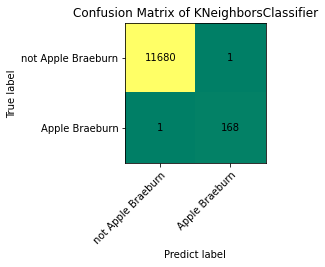

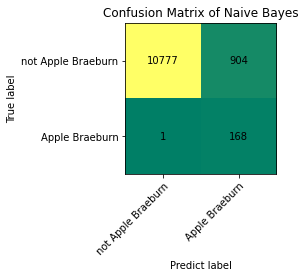

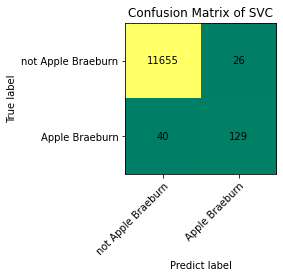

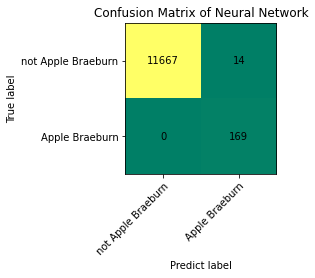

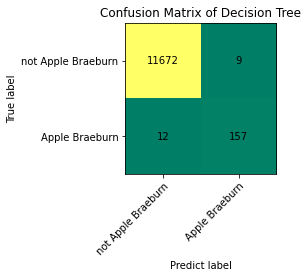

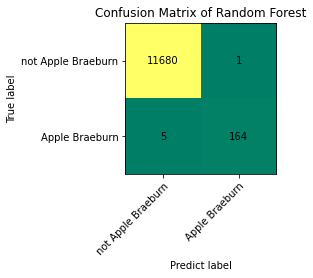

In [ ]:
for i in range(6):
  heatmap_confusion_matrix(model_name[i], confusion_matrix(y_test_new, y_pred[i]))

จาก confusion matrix จะพบว่าในโมเดลของ KNeighborsClassifier มีการทายถูกมากที่สุด รองลงมาจะเป็น Random Forest ที่มีการทายผิดไป 6 รูป ส่วนโมเดลที่การทายผิดมากที่สุดคือ Naïve Bayes มีการทายรูปผิดมากถึง 905 รูป โดยสรุปว่า โมเดลที่มีการทายผิดยิ่งมากเท่าไร โมเดลนั้นจะมีประสิทธิภาพทีไม่ดีนัก

In [ ]:
from sklearn.metrics import f1_score

for i in range(6):
  print("f1 score {} : {:.2f}".format(model_name[i], f1_score(y_test_new,y_pred[i], average='micro')))

f1 score KNeighborsClassifier : 1.00
f1 score Naive Bayes : 0.92
f1 score SVC : 0.99
f1 score Neural Network : 1.00
f1 score Decision Tree : 1.00
f1 score Random Forest : 1.00


จากข้อมูล f1 score จะพบว่า KNeighborsClassifier, Neural Network, Decision Tree และ Random Forest มีค่ามากที่สุด จึงทำให้โมเดลที่กล่าวถึง มีประประสิทธิภาพที่ดีที่สุด

In [ ]:
from sklearn.metrics import classification_report

for i in range(6):
  print("{} :".format(model_name[i]))
  print(classification_report(y_test_new,y_pred[i],target_names=['not Apple Braeburn', 'Apple Braeburn']))
  print("\n")

KNeighborsClassifier :
                    precision    recall  f1-score   support

not Apple Braeburn       1.00      1.00      1.00     11681
    Apple Braeburn       0.99      0.99      0.99       169

          accuracy                           1.00     11850
         macro avg       1.00      1.00      1.00     11850
      weighted avg       1.00      1.00      1.00     11850



Naive Bayes :
                    precision    recall  f1-score   support

not Apple Braeburn       1.00      0.92      0.96     11681
    Apple Braeburn       0.16      0.99      0.27       169

          accuracy                           0.92     11850
         macro avg       0.58      0.96      0.62     11850
      weighted avg       0.99      0.92      0.95     11850



SVC :
                    precision    recall  f1-score   support

not Apple Braeburn       1.00      1.00      1.00     11681
    Apple Braeburn       0.83      0.76      0.80       169

          accuracy                           

In [ ]:
test = [y[::,1] for y in y_pred_proba]

In [ ]:
no_skill = [0 for _ in range(len(y_test_new))]

In [ ]:
from sklearn.metrics import roc_curve

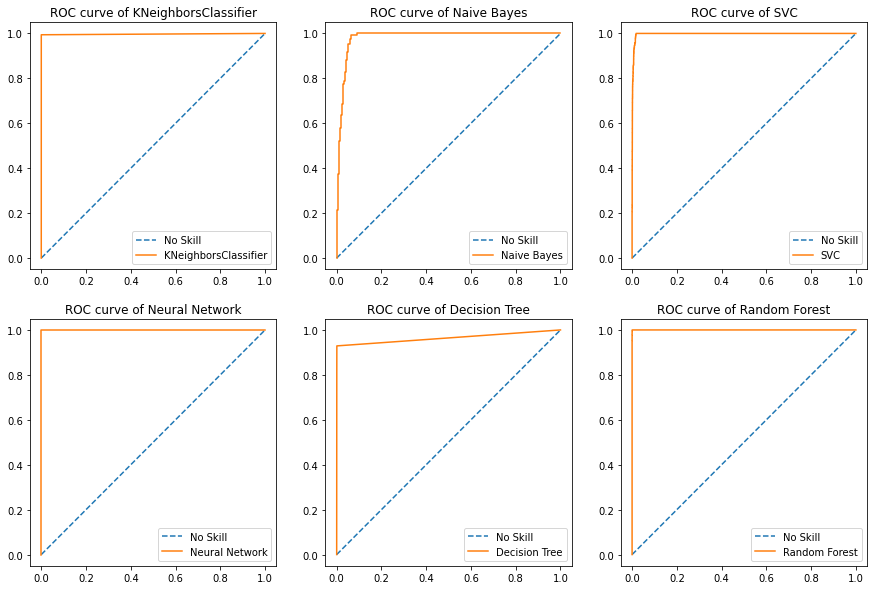

In [ ]:
fig, ax = plt.subplots(2,3, figsize = (15,10))
axes = ax.flatten()

for i in range(6):
  ns_fpr, ns_tpr, _ = roc_curve(y_test_new, no_skill)
  s_fpr, s_tpr, _ = roc_curve(y_test_new, test[i])
  axes[i].set_title("ROC curve of "+model_name[i])
  axes[i].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  axes[i].plot(s_fpr, s_tpr, label=model_name[i])
  axes[i].legend()

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

auc = []
for i in range(6):
  auc.append(roc_auc_score(y_test_new, test[i]))

No handles with labels found to put in legend.


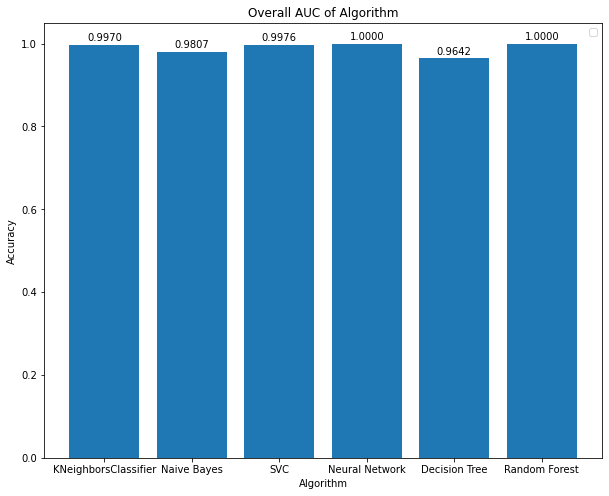

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(model_name, auc)
plt.title('Overall AUC of Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.legend()

for i in range(len(auc)):
  plt.text(i, auc[i]+0.01, "{:.4f}".format(auc[i]), ha = 'center')

plt.show()

## ขั้นตอนการ save โมเดล

In [ ]:
best_model = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaled, y_train)

In [ ]:
import pickle
pickle.dump(best_model, open('my_model.pkl', 'wb'))